In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
df_peserta = pd.read_csv("../data/cleaned/peserta.csv", parse_dates=["tanggal_lahir"])
df_fktp = pd.read_csv("../data/cleaned/fktp-decoded.csv", parse_dates=["tanggal_datang", "tanggal_pulang"])
df_fkrtl = pd.read_csv("../data/cleaned/fkrtl.csv", parse_dates=["tanggal_datang", "tanggal_pulang"])

C:\Users\frend\AppData\Local\Temp\ipykernel_13308\2435307138.py:2: DtypeWarning: Columns (3,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fktp = pd.read_csv("../data/cleaned/fktp-decoded.csv", parse_dates=["tanggal_datang", "tanggal_pulang"])


In [3]:
df_peserta.head()

,no_peserta,no_keluarga,tanggal_lahir,hubungan_keluarga,gender,status_perkawinan,kelas_rawat,segmen_peserta,provinsi_tempat_tinggal,kab_kota_tempat_tinggal,kepemilikan_faskes,jenis_faskes,provinsi_faskes,kab_kota_faskes,bobot,tahun_sampel,status_peserta,tahun_meninggal
0,66897393,66897393,1955-12-31,PESERTA,LAKI-LAKI,CERAI,KELAS II,PPU,ACEH,PIDIE,SWASTA,KLINIK PRATAMA,ACEH,PIDIE,11.318326,2021,AKTIF,0
1,36947751,36947751,1957-01-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA BANDA ACEH,SWASTA,DOKTER UMUM,ACEH,KOTA BANDA ACEH,1.850896,2021,AKTIF,0
2,58468881,58468881,1959-06-15,PESERTA,PEREMPUAN,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA LANGSA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LANGSA,7.597364,2021,AKTIF,0
3,67318251,67318251,1977-11-11,PESERTA,LAKI-LAKI,KAWIN,KELAS II,PPU,ACEH,KOTA LHOKSEUMAWE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LHOKSEUMAWE,6.003162,2021,AKTIF,0
4,80155656,80155656,1961-12-31,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,ACEH,BIREUEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,BIREUEN,11.383931,2021,AKTIF,0


In [4]:
df_peserta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143496 entries, 0 to 143495
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   no_peserta               143496 non-null  int64         
 1   no_keluarga              143496 non-null  int64         
 2   tanggal_lahir            143496 non-null  datetime64[ns]
 3   hubungan_keluarga        143496 non-null  object        
 4   gender                   143496 non-null  object        
 5   status_perkawinan        143496 non-null  object        
 6   kelas_rawat              143496 non-null  object        
 7   segmen_peserta           143496 non-null  object        
 8   provinsi_tempat_tinggal  143496 non-null  object        
 9   kab_kota_tempat_tinggal  143496 non-null  object        
 10  kepemilikan_faskes       143496 non-null  object        
 11  jenis_faskes             143496 non-null  object        
 12  provinsi_faskes 

In [5]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_peserta['umur'] = df_peserta['tanggal_lahir'].apply(calculate_age)
df_peserta.head()

,no_peserta,no_keluarga,tanggal_lahir,hubungan_keluarga,gender,status_perkawinan,kelas_rawat,segmen_peserta,provinsi_tempat_tinggal,kab_kota_tempat_tinggal,kepemilikan_faskes,jenis_faskes,provinsi_faskes,kab_kota_faskes,bobot,tahun_sampel,status_peserta,tahun_meninggal,umur
0,66897393,66897393,1955-12-31,PESERTA,LAKI-LAKI,CERAI,KELAS II,PPU,ACEH,PIDIE,SWASTA,KLINIK PRATAMA,ACEH,PIDIE,11.318326,2021,AKTIF,0,70
1,36947751,36947751,1957-01-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA BANDA ACEH,SWASTA,DOKTER UMUM,ACEH,KOTA BANDA ACEH,1.850896,2021,AKTIF,0,69
2,58468881,58468881,1959-06-15,PESERTA,PEREMPUAN,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA LANGSA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LANGSA,7.597364,2021,AKTIF,0,66
3,67318251,67318251,1977-11-11,PESERTA,LAKI-LAKI,KAWIN,KELAS II,PPU,ACEH,KOTA LHOKSEUMAWE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LHOKSEUMAWE,6.003162,2021,AKTIF,0,48
4,80155656,80155656,1961-12-31,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,ACEH,BIREUEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,BIREUEN,11.383931,2021,AKTIF,0,64


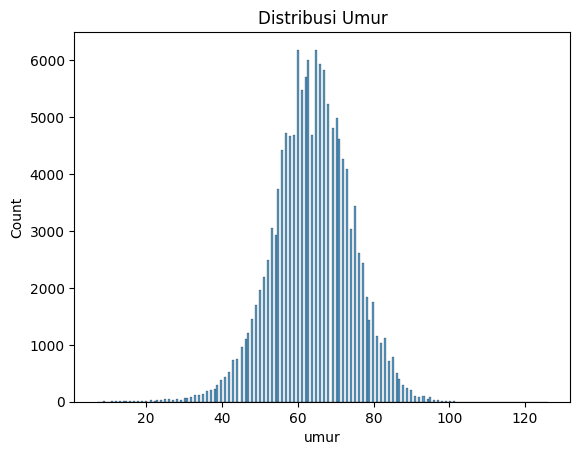

In [6]:
sns.histplot(data=df_peserta, x="umur")
plt.title("Distribusi Umur")
plt.show()

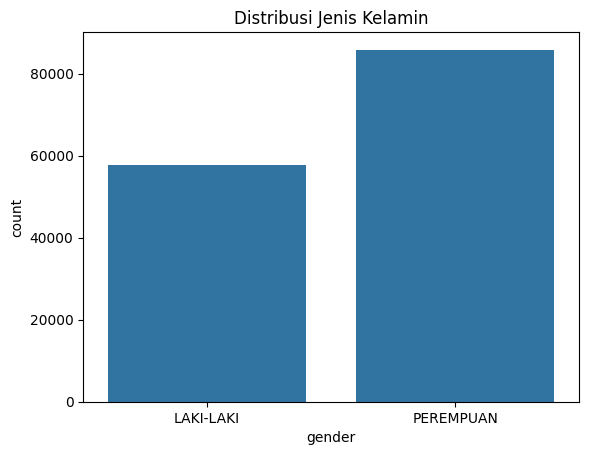

In [7]:
sns.countplot(data=df_peserta, x="gender")
plt.title("Distribusi Jenis Kelamin")
plt.show()

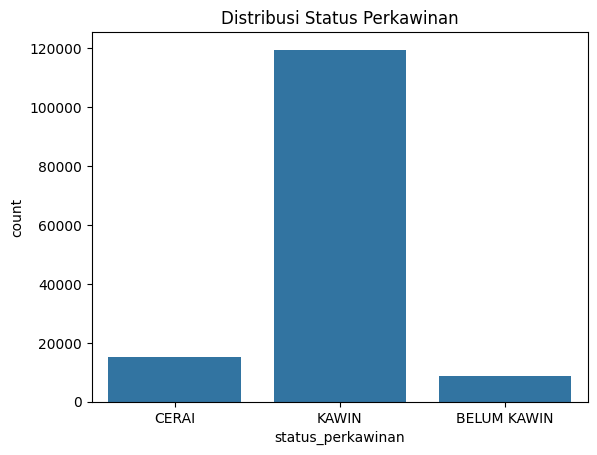

In [8]:
sns.countplot(data=df_peserta, x="status_perkawinan")
plt.title("Distribusi Status Perkawinan")
plt.show()

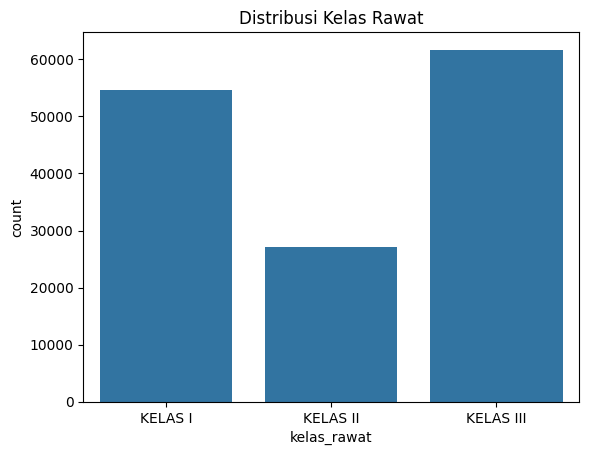

In [9]:
sns.countplot(data=df_peserta, x="kelas_rawat", order=['KELAS I', 'KELAS II', 'KELAS III'])
plt.title("Distribusi Kelas Rawat")
plt.show()

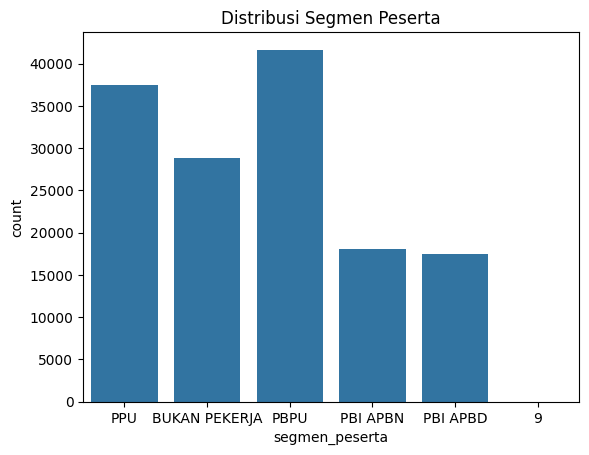

In [10]:
sns.countplot(data=df_peserta, x="segmen_peserta")
plt.title("Distribusi Segmen Peserta")
plt.show()

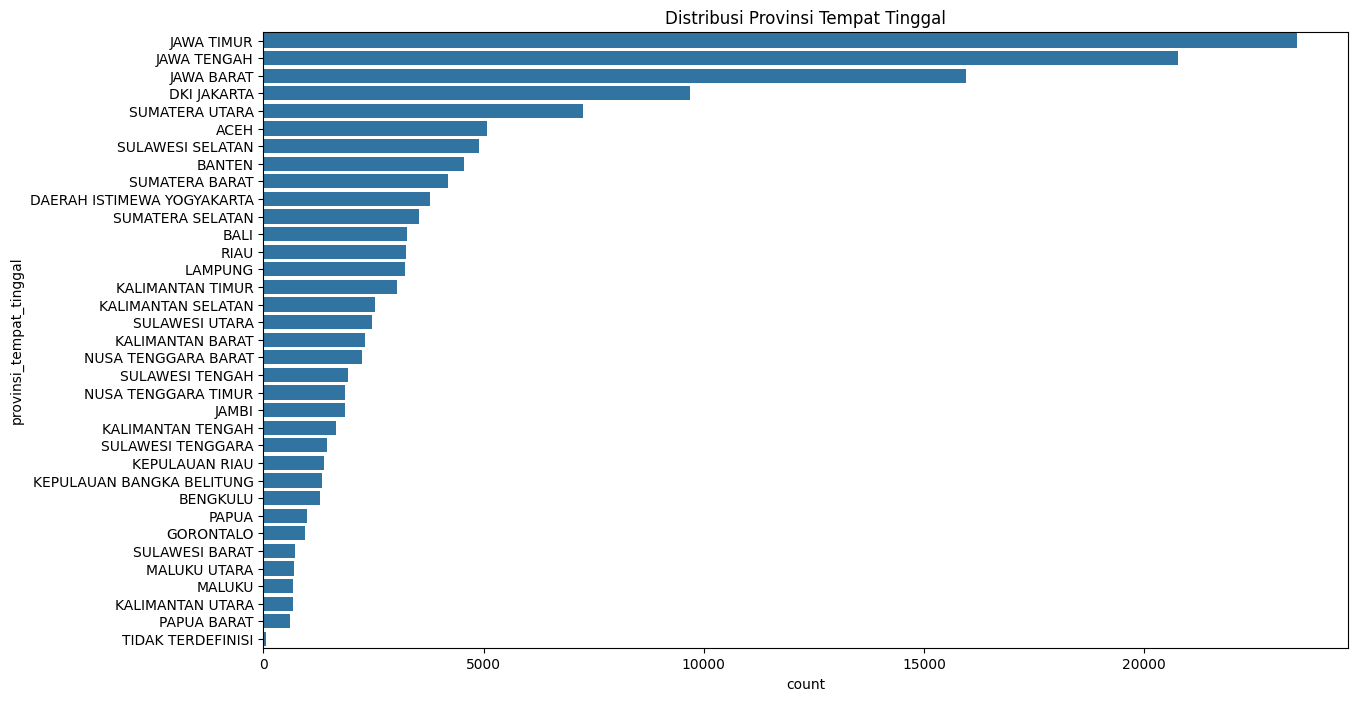

In [11]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_peserta, y="provinsi_tempat_tinggal", order=df_peserta['provinsi_tempat_tinggal'].value_counts().index)
plt.title("Distribusi Provinsi Tempat Tinggal")
plt.show()

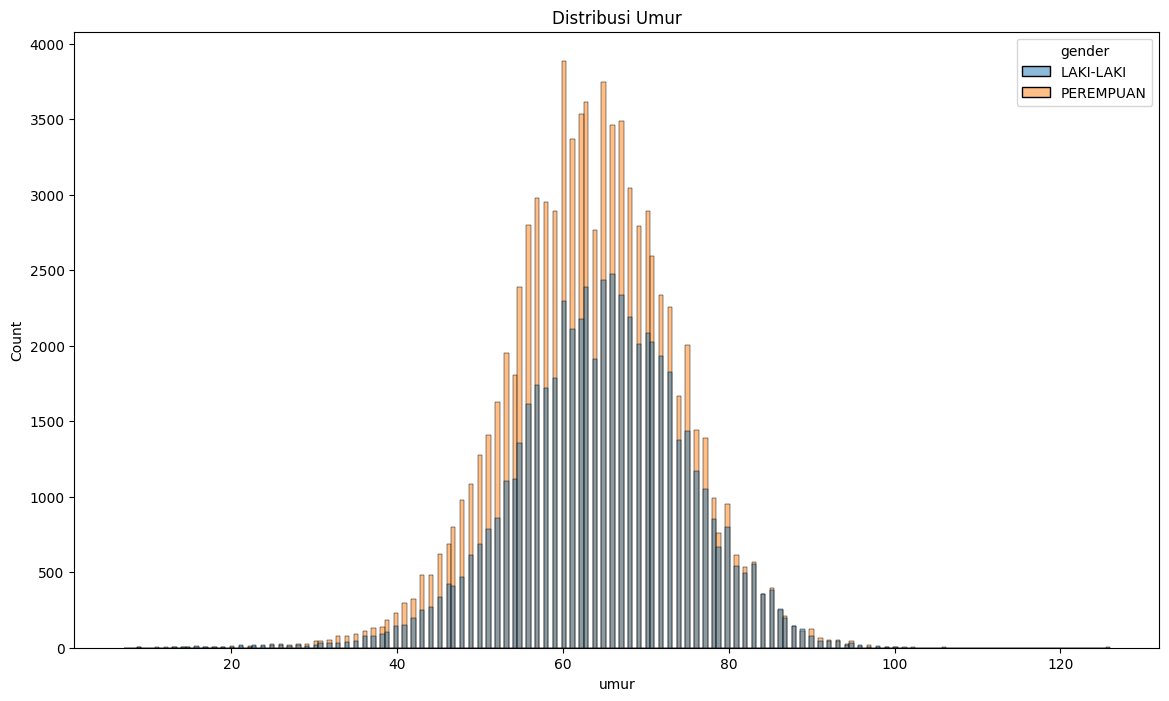

In [12]:
plt.figure(figsize=(14,8))
sns.histplot(data=df_peserta, x="umur", hue="gender")
plt.title("Distribusi Umur")
plt.show()

In [13]:
df_peserta.groupby(["no_keluarga"])['no_peserta'].count().value_counts()

no_peserta
1    142363
2       565
3         1
Name: count, dtype: int64

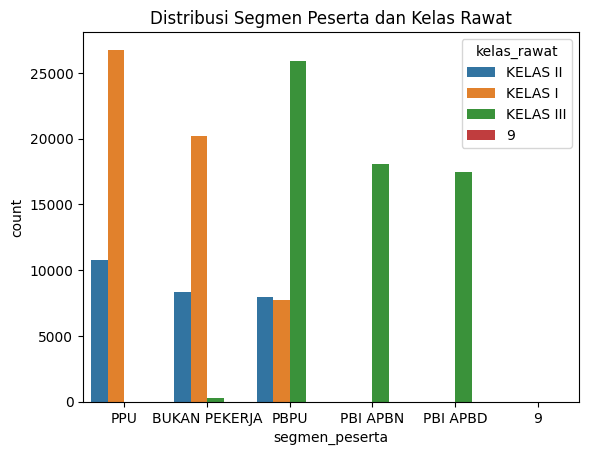

In [14]:
sns.countplot(data=df_peserta, x="segmen_peserta", hue="kelas_rawat")
plt.title("Distribusi Segmen Peserta dan Kelas Rawat")
plt.show()

In [15]:
counts = df_peserta['provinsi_tempat_tinggal'].value_counts().reset_index()

counts.columns = ["provinsi", "jumlah"]

In [16]:
name_map = {
    "DAERAH ISTIMEWA YOGYAKARTA": "YOGYAKARTA",
    "DKI JAKARTA": "JAKARTA RAYA",
}

counts["provinsi"] = counts["provinsi"].replace(name_map)

In [17]:
import geopandas as gpd

gdf = gpd.read_file("../indonesia.geojson")
print(gdf.columns)

Index(['cartodb_id', 'country', 'id_1', 'slug', 'state', 'geometry'], dtype='object')


In [18]:
gdf["state"] = gdf["state"].str.upper().str.strip()

merged = gdf.merge(
    counts,
    left_on="state",
    right_on="provinsi",
    how="left"
)

merged["jumlah"] = merged["jumlah"].fillna(0)

In [19]:
import plotly.express as px

fig = px.choropleth(
    merged,
    geojson=merged.geometry,
    locations=merged.index,
    color="jumlah",
    color_continuous_scale="Reds",
    hover_name="state"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [20]:
df_fktp.groupby("tanggal_datang")['no_peserta'].count().reset_index()

,tanggal_datang,no_peserta
0,2021-01-01,539
1,2021-01-02,2421
2,2021-01-03,553
3,2021-01-04,5655
4,2021-01-05,4717
...,...,...
360,2021-12-27,4563
361,2021-12-28,3975
362,2021-12-29,3557
363,2021-12-30,3104


In [21]:
df_month = df_fktp[df_fktp['tanggal_datang'].dt.month==1]
df_month.groupby("tanggal_datang")['no_peserta'].count().reset_index()

,tanggal_datang,no_peserta
0,2021-01-01,539
1,2021-01-02,2421
2,2021-01-03,553
3,2021-01-04,5655
4,2021-01-05,4717
5,2021-01-06,4314
6,2021-01-07,4144
7,2021-01-08,3948
8,2021-01-09,3471
9,2021-01-10,706


In [22]:
timeseries_fktp = df_fktp.groupby("tanggal_datang")['no_peserta'].count().reset_index()
timeseries_fkrtl = df_fkrtl.groupby("tanggal_datang")['no_peserta'].count().reset_index()
timeseries_fktp.columns = ['tanggal','jumlah']
timeseries_fkrtl.columns = ['tanggal','jumlah']

timeseries_fktp['jenis_faskes'] = 'FKTP'
timeseries_fkrtl['jenis_faskes'] = 'FKRTL'

timeseries = pd.concat([timeseries_fktp, timeseries_fkrtl])

fig = px.line(
    timeseries,
    x="tanggal",
    y="jumlah",
    color="jenis_faskes",
    title="Tren Pengunjung Faskes"
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [29]:
df_fktp['kode_nama_diagnosis_ICD10'].value_counts().index[0:10]

Index(['E11 Type 2 diabetes mellitus', 'Missing',
       'I10 Essential (primary) hypertension', 'E10 Type 1 diabetes mellitus',
       'E14 Unspecified diabetes mellitus', 'I11 Hypertensive heart disease',
       'M79 Other soft tissue disorders, not elsewhere classified',
       'J06 Acute upper respiratory infections of multiple and unspecified sites',
       'K30 Functional dyspepsia', 'I25 Chronic ischaemic heart disease'],
      dtype='object', name='kode_nama_diagnosis_ICD10')

In [27]:
df_fkrtl['kode_nama_diagnosis_ICD10'].value_counts()

kode_nama_diagnosis_ICD10
E11 Type 2 diabetes mellitus                                                               171487
N18 Chronic kidney disease                                                                  90472
Z09 Follow-up examination after treatment for conditions other than malignant neoplasms     74276
E10 Type 1 diabetes mellitus                                                                47050
I25 Chronic ischaemic heart disease                                                         29593
                                                                                            ...  
B83 Other helminthiases                                                                         1
F12 Mental and behavioural disorders due to use of cannabinoids                                 1
Y70 Anaesthesiology devices associated with adverse incidents                                   1
A07 Other protozoal intestinal diseases                                                     

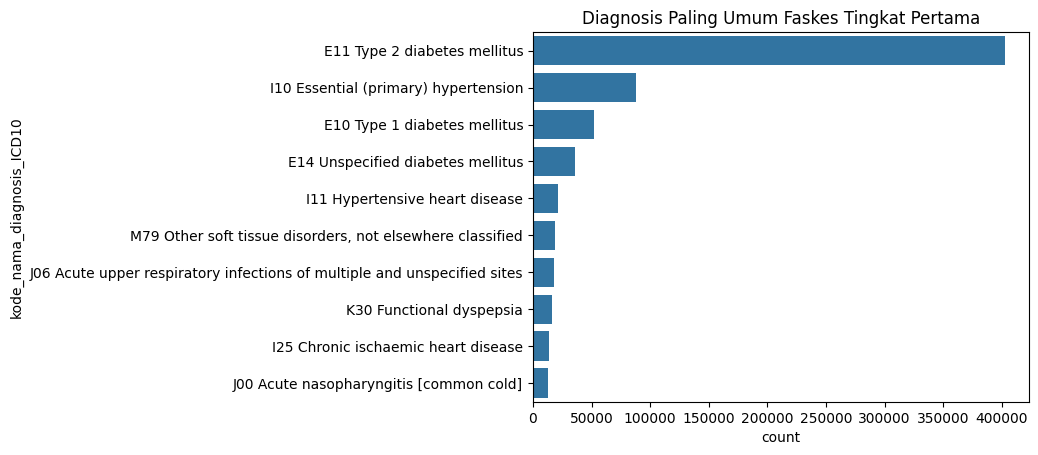

In [48]:
sns.countplot(data=df_fktp, y="kode_nama_diagnosis_ICD10", order=df_fktp['kode_nama_diagnosis_ICD10'].value_counts().index[0:11].drop("Missing"))
plt.title("Diagnosis Paling Umum Faskes Tingkat Pertama")
plt.show()

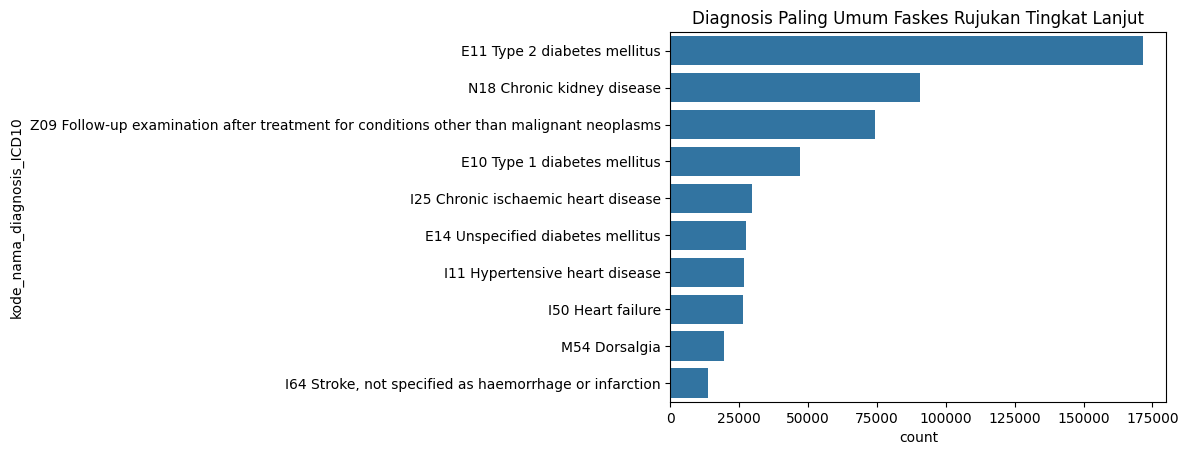

In [51]:
sns.countplot(data=df_fkrtl, y="kode_nama_diagnosis_ICD10", order=df_fkrtl['kode_nama_diagnosis_ICD10'].value_counts().index[0:10])
plt.title("Diagnosis Paling Umum Faskes Rujukan Tingkat Lanjut")
plt.show()

In [52]:
df_fktp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188324 entries, 0 to 1188323
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   no_peserta                 1188324 non-null  int64         
 1   no_keluarga                1188324 non-null  int64         
 2   bobot                      1188324 non-null  float64       
 3   id_kunjungan_fktp          1188324 non-null  object        
 4   tanggal_datang             1188324 non-null  datetime64[ns]
 5   tanggal_pulang             1188324 non-null  datetime64[ns]
 6   provinsi_fktp              1188324 non-null  object        
 7   kab_kota_fktp              1188324 non-null  object        
 8   kepemilikan_fktp           1188324 non-null  object        
 9   jenis_fktp                 1188324 non-null  object        
 10  tipe_fktp                  1188324 non-null  object        
 11  tingkat_pelayanan          1188324 no

In [65]:
n_tidak_dirujuk = len(df_fktp[df_fktp['provinsi_fkrtl'] == "TIDAK DIRUJUK"])
n_dirujuk = len(df_fktp[df_fktp['provinsi_fkrtl'] != "TIDAK DIRUJUK"])
n_dirujuk, n_tidak_dirujuk

(199502, 988822)

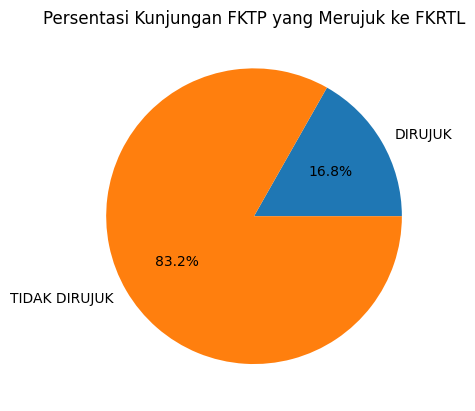

In [84]:
plt.pie(x=[n_dirujuk, n_tidak_dirujuk], labels=['DIRUJUK', 'TIDAK DIRUJUK'], autopct='%1.1f%%')
plt.title("Persentasi Kunjungan FKTP yang Merujuk ke FKRTL")
plt.show()

In [71]:
df_fkrtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826641 entries, 0 to 826640
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   no_peserta                        826641 non-null  int64         
 1   no_keluarga                       826641 non-null  int64         
 2   bobot                             826641 non-null  float64       
 3   id_kunjungan_fktp                 826641 non-null  object        
 4   id_kunjungan_fkrtl                826641 non-null  object        
 5   tanggal_datang                    826641 non-null  datetime64[ns]
 6   tanggal_pulang                    826641 non-null  datetime64[ns]
 7   provinsi_fkrtl                    826641 non-null  object        
 8   kab_kota_fkrtl                    826641 non-null  object        
 9   kepemilikan_fkrtl                 826641 non-null  object        
 10  jenis_fkrtl                     

In [81]:
pd.options.display.float_format = '{:,.0f}'.format

In [82]:
avg_cost_diagnosis = df_fkrtl.groupby("kode_nama_diagnosis_ICD10")['biaya_tagih'].mean().sort_values(ascending=False)[0:10].reset_index()
avg_cost_diagnosis.columns = ['diagnosis','avg_biaya']
avg_cost_diagnosis

,diagnosis,avg_biaya
0,V02 Pedestrian injured in collision with two- ...,"48,004,800"
1,I06 Rheumatic aortic valve diseases,"30,438,350"
2,S76 Injury of muscle and tendon at hip and thi...,"20,821,000"
3,G91 Hydrocephalus,"18,462,057"
4,"N12 Tubulo-interstitial nephritis, not specifi...","14,343,000"
5,C75 Malignant neoplasm of other endocrine glan...,"13,750,200"
6,"R58 Haemorrhage, not elsewhere classified","12,093,350"
7,Q96 Turner syndrome,"11,914,550"
8,S85 Injury of blood vessels at lower leg level,"11,893,200"
9,T02 Fractures involving multiple body regions,"11,686,400"


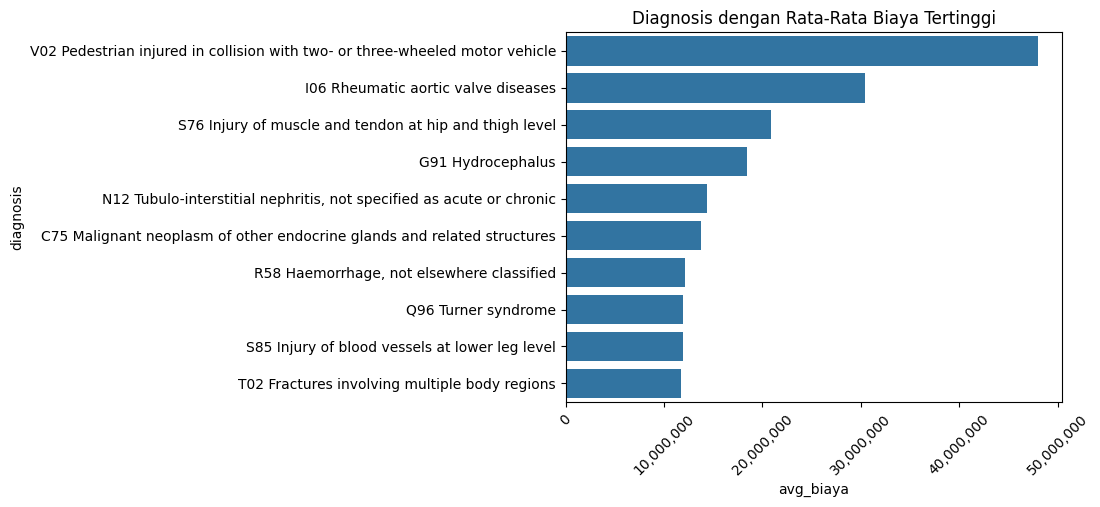

In [88]:
from matplotlib.ticker import FuncFormatter

sns.barplot(data=avg_cost_diagnosis, x="avg_biaya", y="diagnosis")
plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x:,.0f}')
)
plt.title("Diagnosis dengan Rata-Rata Biaya Tertinggi")
plt.xticks(rotation=45)
plt.show()